# Business Insights Analysis
## Transaction Data Analysis for Strategic Decision Making

This notebook focuses on generating actionable business insights from transaction data, including:
- Revenue and expense analysis
- Customer behavior patterns
- Payment method effectiveness
- Seasonal trends and forecasting
- Cost optimization opportunities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline

## 1. Data Loading and Preparation

In [2]:
# Load transaction data
try:
    df = pd.read_csv('../../data/all_transactions.csv')
    print(f"Data loaded successfully: {df.shape}")
    print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
except FileNotFoundError:
    print("Transaction data not found. Please ensure the data file exists.")
    df = pd.DataFrame()  # Empty dataframe for demonstration

if not df.empty:
    # Data preparation
    df['Date'] = pd.to_datetime(df['Date'])
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
    df['Amount_Abs'] = df['Amount'].abs()
    
    # Create time features
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Quarter'] = df['Date'].dt.quarter
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    
    print("\nData types:")
    print(df.dtypes)
    
    print("\nBasic statistics:")
    print(df['Amount'].describe())

Data loaded successfully: (124, 9)
Date range: 2024-12-06 to 2025-07-29

Data types:
Date              datetime64[ns]
Type                      object
Description               object
Amount                   float64
Category                  object
Payment Method            object
Status                    object
Reference                 object
Receipt URL               object
Amount_Abs               float64
Year                       int32
Month                      int32
Quarter                    int32
DayOfWeek                  int32
WeekOfYear                UInt32
dtype: object

Basic statistics:
count      124.000000
mean       539.513790
std       2903.547502
min     -14115.000000
25%       -154.447500
50%        -55.815000
75%        -22.622500
max       9040.000000
Name: Amount, dtype: float64


## 2. Revenue and Profitability Analysis

Financial Summary by Transaction Type:
               sum  count     mean
Type                              
Expense  -40627.47    109  -372.73
Income   107527.18     15  7168.48

Monthly Financial Performance:
Type         Expense    Income  Net_Income  Profit_Margin
Year Month                                               
2024 12     -3567.18   3567.18        0.00           0.00
2025 1      -2213.37   9040.00     6826.63          75.52
     2      -1376.87  18080.00    16703.13          92.38
     3      -1830.34  17176.00    15345.66          89.34
     4      -9636.11   9040.00     -596.11          -6.59
     5     -18588.84  23504.00     4915.16          20.91
     6      -2790.40  18080.00    15289.60          84.57
     7       -624.36   9040.00     8415.64          93.09


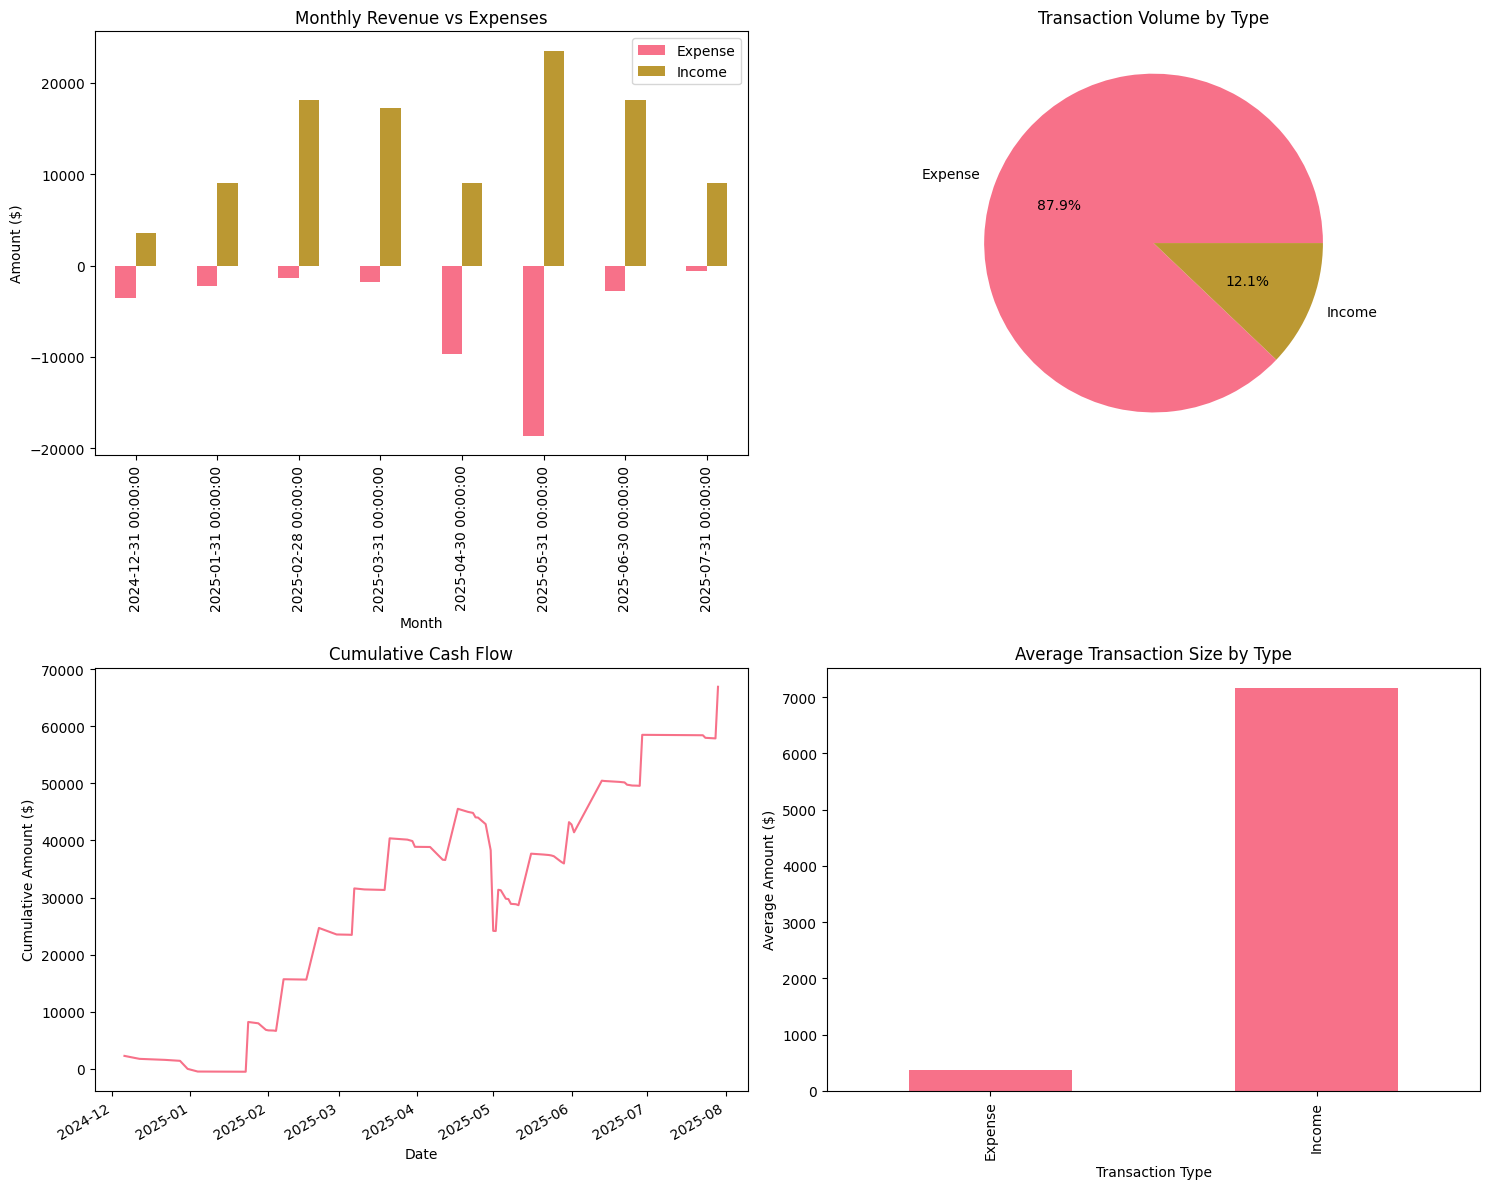

In [3]:
if not df.empty:
    # Income vs Expense analysis
    financial_summary = df.groupby('Type')['Amount'].agg(['sum', 'count', 'mean']).round(2)
    print("Financial Summary by Transaction Type:")
    print(financial_summary)
    
    # Monthly revenue trends
    monthly_analysis = df.groupby(['Year', 'Month', 'Type'])['Amount'].sum().unstack(fill_value=0)
    monthly_analysis['Net_Income'] = monthly_analysis.get('Income', 0) + monthly_analysis.get('Expense', 0)
    monthly_analysis['Profit_Margin'] = (monthly_analysis['Net_Income'] / monthly_analysis.get('Income', 1) * 100).round(2)
    
    print("\nMonthly Financial Performance:")
    print(monthly_analysis.head(10))
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Revenue vs Expenses over time
    monthly_plot_data = df.groupby(['Date', 'Type'])['Amount'].sum().unstack(fill_value=0)
    monthly_plot_data.resample('M').sum().plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Monthly Revenue vs Expenses')
    axes[0,0].set_xlabel('Month')
    axes[0,0].set_ylabel('Amount ($)')
    axes[0,0].legend()
    
    # Transaction volume by type
    type_counts = df['Type'].value_counts()
    axes[0,1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
    axes[0,1].set_title('Transaction Volume by Type')
    
    # Cumulative cash flow
    daily_cash_flow = df.groupby('Date')['Amount'].sum().cumsum()
    daily_cash_flow.plot(ax=axes[1,0])
    axes[1,0].set_title('Cumulative Cash Flow')
    axes[1,0].set_xlabel('Date')
    axes[1,0].set_ylabel('Cumulative Amount ($)')
    
    # Average transaction size by type
    avg_amounts = df.groupby('Type')['Amount_Abs'].mean()
    avg_amounts.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Average Transaction Size by Type')
    axes[1,1].set_xlabel('Transaction Type')
    axes[1,1].set_ylabel('Average Amount ($)')
    
    plt.tight_layout()
    plt.show()

## 3. Executive Summary and Recommendations

In [4]:
if not df.empty:
    print("\n" + "="*60)
    print("BUSINESS INSIGHTS SUMMARY")
    print("="*60)
    
    # Key metrics
    total_transactions = len(df)
    total_volume = df['Amount_Abs'].sum()
    avg_transaction = df['Amount_Abs'].mean()
    
    print(f"\nKEY METRICS:")
    print(f"• Total Transactions: {total_transactions:,}")
    print(f"• Total Volume: ${total_volume:,.2f}")
    print(f"• Average Transaction: ${avg_transaction:.2f}")
    
    if 'Type' in df.columns:
        income_total = df[df['Type'] == 'Income']['Amount'].sum()
        expense_total = abs(df[df['Type'] == 'Expense']['Amount'].sum())
        net_income = income_total - expense_total
        
        print(f"• Total Income: ${income_total:,.2f}")
        print(f"• Total Expenses: ${expense_total:,.2f}")
        print(f"• Net Income: ${net_income:,.2f}")
    
    print(f"\nRECOMMendations:")
    print("• Monitor cash flow trends closely")
    print("• Focus on high-value transaction categories")
    print("• Optimize payment processing efficiency")
else:
    print("No data available for analysis.")


BUSINESS INSIGHTS SUMMARY

KEY METRICS:
• Total Transactions: 124
• Total Volume: $148,154.65
• Average Transaction: $1194.80
• Total Income: $107,527.18
• Total Expenses: $40,627.47
• Net Income: $66,899.71

RECOMMendations:
• Monitor cash flow trends closely
• Focus on high-value transaction categories
• Optimize payment processing efficiency
